# An Extensive GoodReads Dataset containing 100k books

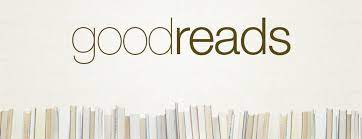

**This dataset some of the generally required columns needed to express a book. This study includes a detailed title analysis, author analysis, and content-based recommendation system.**

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from textblob import Word, TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('GoodReads_100k_books.csv')

In [3]:
df.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        100000 non-null  object 
 1   bookformat    96772 non-null   object 
 2   desc          93228 non-null   object 
 3   genre         89533 non-null   object 
 4   img           96955 non-null   object 
 5   isbn          85518 non-null   object 
 6   isbn13        88565 non-null   object 
 7   link          100000 non-null  object 
 8   pages         100000 non-null  int64  
 9   rating        100000 non-null  float64
 10  reviews       100000 non-null  int64  
 11  title         99999 non-null   object 
 12  totalratings  100000 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 9.9+ MB


In [5]:
df.shape

(100000, 13)

**The dataset contains 100000 observations and 13 columns.**

In [6]:
df.isnull().sum()

author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages               0
rating              0
reviews             0
title               1
totalratings        0
dtype: int64

In [7]:
df[df['pages'] == 0].shape[0]

7752

In [8]:
df = df[df['pages'] != 0]

**When we look at the first 5 observations with the head function, it is found that there are books with 0 pages.These observations should be dropped from the dataset.**

In [9]:
df.drop(['img', 'isbn', 'isbn13', 'link'], axis=1, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,author,bookformat,desc,genre,pages,rating,reviews,title,totalratings
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
5,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",368,3.73,7,The Human Equation: Building Profits by Puttin...,119
6,Jeffrey Pfeffer,Paperback,"""Competitive Advantage Through People"" explore...","Business,Leadership,Business,Management,Romanc...",304,3.65,1,Competitive Advantage Through People: Unleashi...,20


In [12]:
df.shape

(79754, 9)

## Title Analysis

In [13]:
# how many unique titles are there ?

df['title'].nunique()

77847

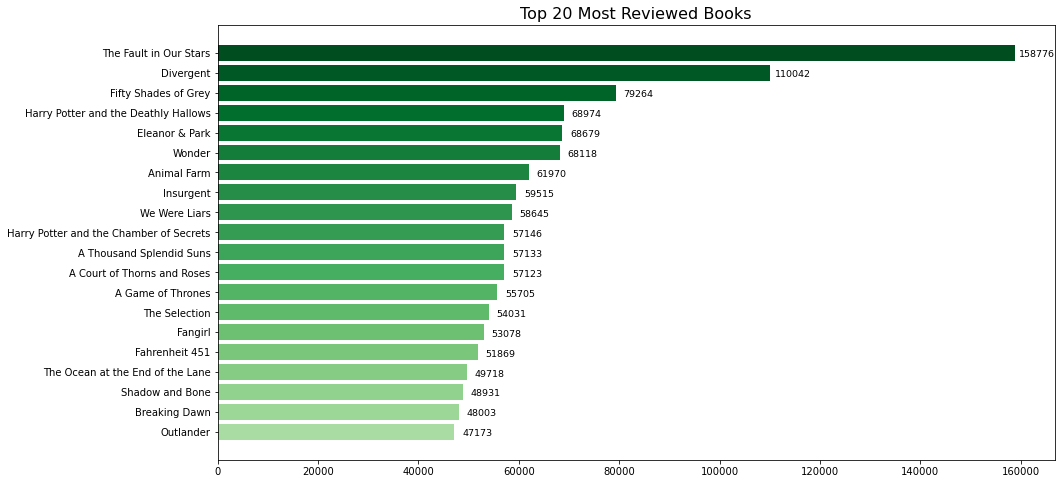

In [14]:
plt.figure(figsize=(15, 8))
most_reviewed = df.groupby('title')[['reviews']].sum().sort_values(by='reviews', ascending=False).reset_index()[:20]

palette = sns.color_palette('Greens_r', 30)
ax = plt.barh(most_reviewed['title'] , most_reviewed['reviews'], color=palette)
for p in ax.patches:
    width = p.get_width()
    plt.text(4500+p.get_width(), p.get_y()+0.6*p.get_height(),
             '{:d}'.format(width),
             ha='center', va='center', fontsize=9.5)
plt.gca().invert_yaxis()
plt.title('Top 20 Most Reviewed Books', fontsize=16)
plt.show()

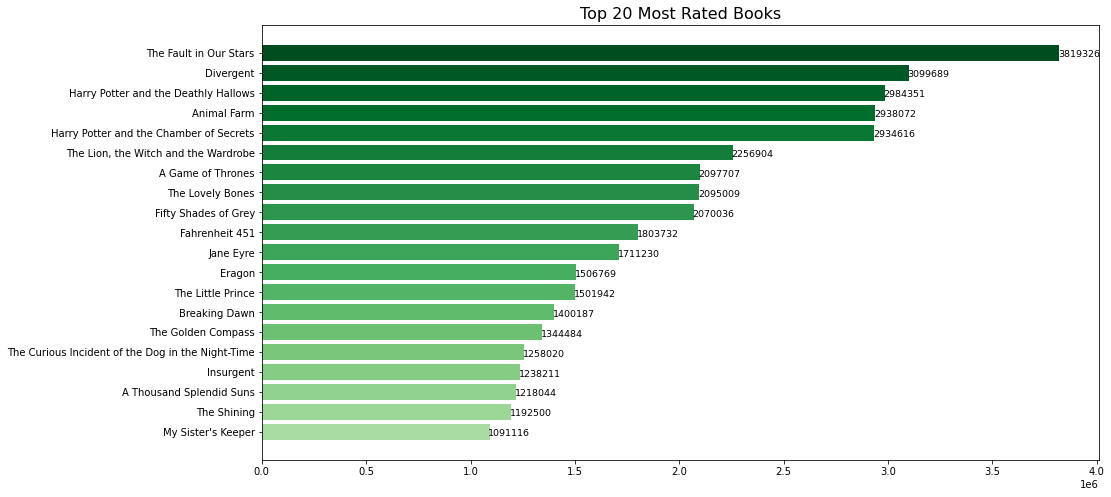

In [15]:
plt.figure(figsize=(15, 8))
most_rated = df.groupby('title')[['totalratings']].sum().sort_values(by='totalratings', ascending=False).reset_index()[:20]

palette = sns.color_palette('Greens_r', 30)
ax = plt.barh(most_rated['title'] , most_rated['totalratings'], color=palette)
for p in ax.patches:
    width = p.get_width()
    plt.text(95000+p.get_width(), p.get_y()+0.6*p.get_height(),
             '{:d}'.format(width),
             ha='center', va='center', fontsize=9.5)
plt.gca().invert_yaxis()
plt.title('Top 20 Most Rated Books', fontsize=16)
plt.show()

####  Titles with the highest rating among titles with a total rating count of at least 100k 

In [16]:
df_ = df.groupby('title')[['totalratings']].sum().reset_index()
filtered = df_[df_['totalratings'] > 100000].title.values.tolist()

df[df['title'].isin(filtered)].groupby('title')[['totalratings', 'rating']]. \
                                agg({'rating':'mean','totalratings':'sum'}).sort_values(by=['rating', 'totalratings'],
                                                                                        ascending=[False, False])[:10]

,rating,totalratings
title,,
Harry Potter and the Deathly Hallows,4.62,2984351
"Harry Potter and the Order of the Phoenix (Harry Potter, #5, Part 1)",4.62,133779
The Wise Man's Fear,4.54,456510
The Complete Maus,4.53,153660
The House of Hades,4.52,294712
The Hunger Games: Official Illustrated Movie Companion,4.52,175110
Redeeming Love,4.50,226121
The Green Mile,4.45,261605
"Death Note, Vol. 1: Boredom",4.45,209127


#### Titles with the lowest rating among titles with a total rating count of at least 100k 

In [17]:
df[df['title'].isin(filtered)].groupby('title')[['totalratings', 'rating']]. \
                               agg({'rating':'mean','totalratings':'sum'}).sort_values(by=['rating', 'totalratings'], 
                                                                                       ascending=[True, False])[:10]

,rating,totalratings
title,,
The Casual Vacancy,3.30,313167
The Silent Wife,3.32,104078
The Scarlet Letter,3.42,733658
The Turn of the Screw,3.42,117055
The Marriage Plot,3.45,113354
"Moby-Dick or, the Whale",3.51,493984
The Tenth Circle,3.51,122618
Crossed,3.53,224446
Death of a Salesman,3.54,195711


### Bookformat Analysis

In [18]:
df.groupby('bookformat')['rating'].agg({'count', 'mean'}).sort_values(by='count', ascending=False)[:5]

,mean,count
bookformat,,
Paperback,3.91,44817
Hardcover,3.91,22811
ebook,3.80,4116
Kindle Edition,3.84,3982
Mass Market Paperback,3.82,2752


### Pages Analysis

In [19]:
df['pages'].value_counts(bins=7)

(-69.0, 10000.857]        79750
(10000.857, 20000.714]        1
(20000.714, 30000.571]        1
(30000.571, 40000.429]        1
(60000.143, 70000.0]          1
(40000.429, 50000.286]        0
(50000.286, 60000.143]        0
Name: pages, dtype: int64

In [20]:
df[df['pages'] > 10000]

,author,bookformat,desc,genre,pages,rating,reviews,title,totalratings
22871,Charles Dickens,Kindle Edition,* ALL 15 Novels and ALL illustrated with the o...,"Classics,Fiction,Literature,Anthologies,Collec...",21723,4.41,22,The Complete Works of Charles Dickens,1488
29938,Phyllis Peterson,Hardcover,Assisting the Traumatized Soul reaches out to ...,"Religion,Baha I",70000,4.75,0,Assisting the Traumatized Soul: Healing the Wo...,4
83512,EncyclopÃ¦dia Britannica,Hardcover,Comprises one Propaedia (outline of knowledge)...,"Reference,Reference,Dictionaries,Nonfiction",32000,4.46,16,Encyclopaedia Britannica (Set),89
96255,HonorÃ© de Balzac,Kindle Edition,This comprehensive eBook presents the complete...,"Fiction,Classics,Cultural,France,Anthologies,C...",15918,4.30,7,Works of Honore de Balzac,177


In [21]:
df = df.loc[df['title'] != 'Assisting the Traumatized Soul: Healing the Wounded Talisman' ]

In [22]:
df[['pages']].describe([.05, .1, .25, .75, .9, .95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
pages,79753.00,279.12,245.03,1.00,40.00,88.00,175.00,256.00,352.00,456.00,563.00,32000.00


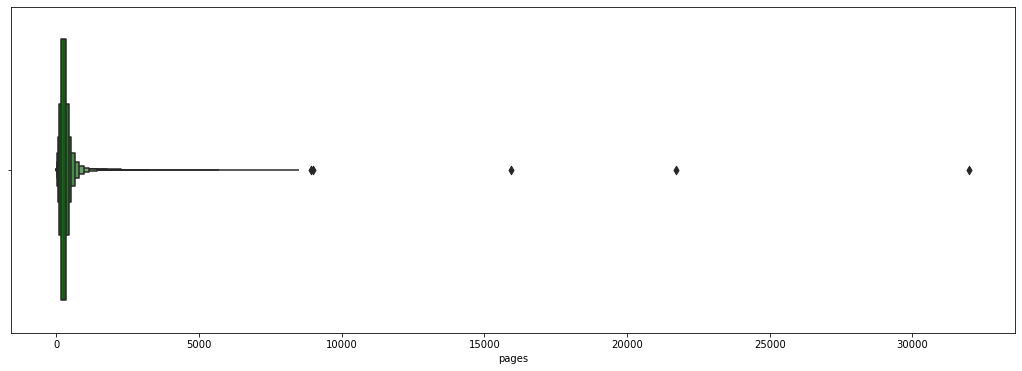

In [23]:
plt.figure(figsize=(18, 6))
sns.boxenplot(x=df['pages'], color='Green');

**The books with a very high number of pages were examined. The title with the error was dropped from the dataset.**

### Genre Analysis

In [24]:
df['genre'] = df['genre'].str.replace('M M', 'MM')

In [25]:
df['genre'] = df['genre'].str.lower()

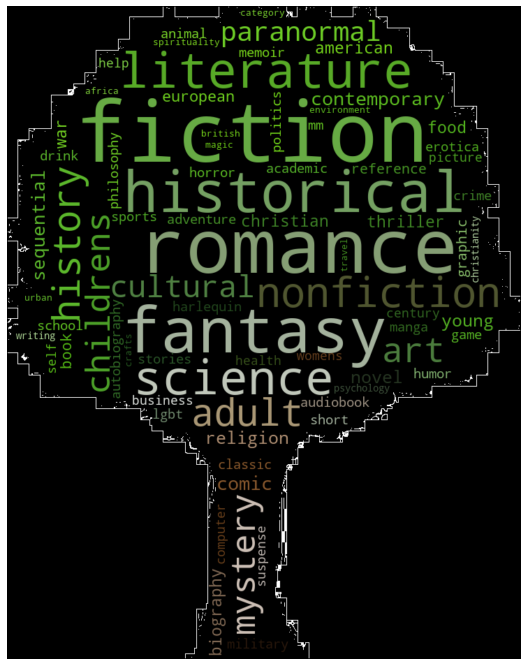

In [26]:
text = " ".join(i for i in df['genre'])
mask = np.array(Image.open('09d318ee250c1c5bd3bc31ae7e4ed1d1.jpg'))
wordcloud = WordCloud(max_font_size=120,
                      max_words=75,
                      background_color="black",
                      collocations=False,
                      mask=mask,
                      contour_width=1,
                      contour_color="white"
                      ).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

### Author Analysis

In [28]:
df['author'].nunique()

54909

**Due to the fact that some books have more than 1 author, split operations are required in the data set to achieve correct results.**

In [29]:
df[['a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'a_6']] = df['author'].str.split(',', n=5, expand=True)

In [30]:
df.loc[df['a_6'].isnull() == False, 'a_6'] = 'Others'

In [31]:
df.loc[df['a_6'].isnull() == False, 'a_1':]

,a_1,a_2,a_3,a_4,a_5,a_6
75,Rob Boyle,Brian Cross,J.M. Hardy,Olivia Hill,Ken Horner,Others
84,Richard Pini,Robert Lynn Asprin,Lynn Abbey,Mark C. Perry,C.J. Cherryh,Others
113,Martin H. Greenberg,Neil Gaiman,George R.R. Martin,Lucius Shepard,Robert Sheckley,Others
257,T. Pines,D.E. Athkins,Judith Bauer Stamper,R.L. Stine,Ellen Emerson White,Others
433,Levi Bryant,Nick Srnicek,Martin HÃ¤gglund,Peter Hallward,Graham Harman,Others
...,...,...,...,...,...,...
99856,The New Yorker,Haruki Murakami,Calvin Trillin,M.F.K. Fisher,Roald Dahl,Others
99887,Weldon Burge,Shaun Meeks,Christian A. Larsen,L.L. Soares,Michael Bailey,Others
99902,Marcio Noguchi,Shuki Kato,Jason Ku,Sebastian Arellano,Won Park,Others
99929,Will Gompertz,Chloe Aridjis,Lila Azam Zanganeh,Alain de Botton,James Bridle,Others


In [32]:
df_authors = pd.concat([df.groupby('a_1')[['reviews', 'totalratings', 'rating']].agg({'reviews':'sum', 'totalratings': 'sum', 'rating' : 'mean'}),
                        df.groupby('a_2')[['reviews', 'totalratings', 'rating']].agg({'reviews':'sum', 'totalratings': 'sum', 'rating' : 'mean'}), 
                        df.groupby('a_3')[['reviews', 'totalratings', 'rating']].agg({'reviews':'sum', 'totalratings': 'sum', 'rating' : 'mean'}),
                        df.groupby('a_4')[['reviews', 'totalratings', 'rating']].agg({'reviews':'sum', 'totalratings': 'sum', 'rating' : 'mean'}),
                        df.groupby('a_5')[['reviews', 'totalratings', 'rating']].agg({'reviews':'sum', 'totalratings': 'sum', 'rating' : 'mean'})],
                        axis=0).reset_index()

In [33]:
df_authors.rename(columns={'index':'author'}, inplace=True)

In [34]:
df_authors['author'].nunique()

65344

**It is seen that the count of authors in the data set has increased.There are also authors with more than 1 book in the data set.**

In [35]:
df_authors['author'].shape[0]

71853

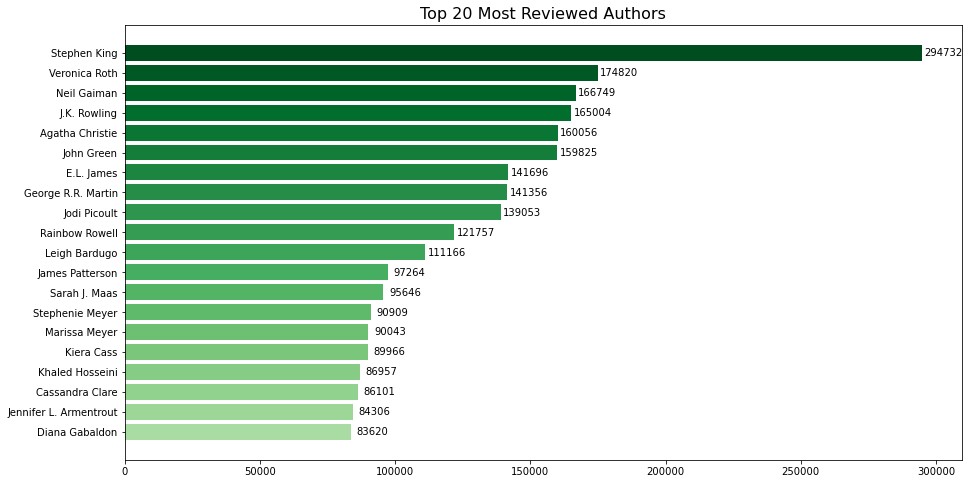

In [36]:
plt.figure(figsize=(15, 8))
df_author = df_authors.groupby('author')[['reviews']].sum().sort_values(by='reviews', ascending=False).reset_index()[:20]
palette = sns.color_palette("Greens_r", 30)
ax = plt.barh(df_author['author'] , df_author['reviews'], color=palette)
for p in ax.patches:
    width = p.get_width()
    plt.text(8000+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:d}'.format(width),
             ha='center', va='center')
plt.gca().invert_yaxis()
plt.title('Top 20 Most Reviewed Authors', fontsize=16)
plt.show()

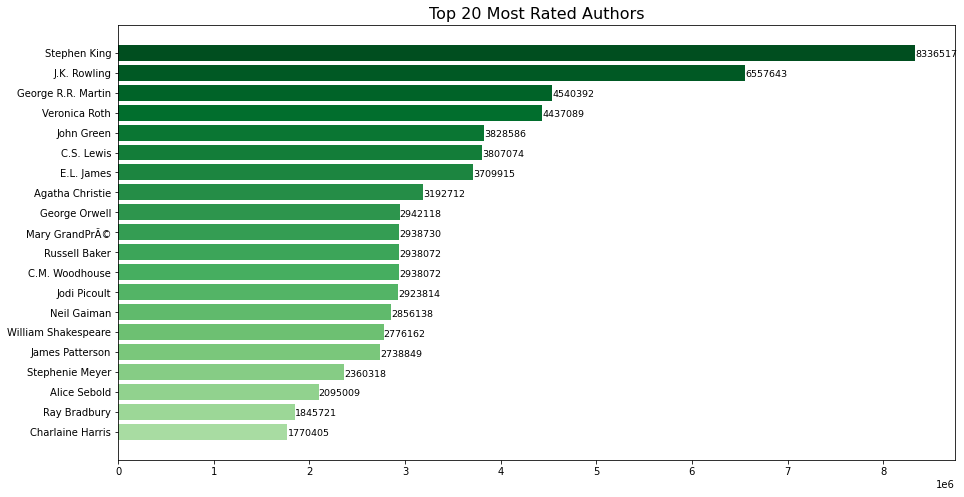

In [37]:
plt.figure(figsize=(15, 8))
most_rated_a = df_authors.groupby('author')[['totalratings']].sum().sort_values(by='totalratings', ascending=False).reset_index()[:20]

palette = sns.color_palette('Greens_r', 30)
ax = plt.barh(most_rated_a['author'] , most_rated_a['totalratings'], color=palette)
for p in ax.patches:
    width = p.get_width()
    plt.text(220000+p.get_width(), p.get_y()+0.6*p.get_height(),
             '{:d}'.format(width),
             ha='center', va='center', fontsize=9.5)
plt.gca().invert_yaxis()
plt.title('Top 20 Most Rated Authors', fontsize=16)
plt.show()

#### Authors with the highest rating among authors with a total rating count of at least 200k 

In [39]:
author_rate = df_authors.groupby('author')[['totalratings']].sum().reset_index()
filtered_author = author_rate[author_rate['totalratings'] > 200000].author.values.tolist()

df_authors[df_authors['author'].isin(filtered_author)].groupby('author')[['totalratings', 'rating']]. \
                                                     agg({'rating':'mean', 'totalratings':'sum'}).sort_values(by=['rating', 'totalratings'],
                                                                                        ascending=[False, False])[:10]

,rating,totalratings
author,,
Francine Rivers,4.50,226121
Hajime Isayama,4.47,240331
Pookie Rolf,4.45,271605
Bisco Hatori,4.44,250136
Toni Morrison,4.44,404851
R.J. Palacio,4.42,810875
Madeline Miller,4.40,339638
Takeshi Obata,4.37,427606
J.R.R. Tolkien,4.36,407297


#### Authors with the lowest rating among authors with a total rating count of at least 200k 

In [40]:
df_authors[df_authors['author'].isin(filtered_author)].groupby('author')[['totalratings', 'rating']]. \
                                                     agg({'rating':'mean', 'totalratings':'sum'}).sort_values(by=['rating', 'totalratings'],
                                                                                        ascending=[True, False])[:10]

,rating,totalratings
author,,
Chetan Bhagat,3.08,207299
Thomas E. Connolly,3.42,733658
Rockwell Kent,3.51,493984
John Green,3.52,3828586
Arthur Miller,3.53,535252
Herman Melville,3.53,567104
Andrew Delbanco,3.54,494615
Christopher Bigsby,3.59,338877
Paulo Coelho,3.61,698488


# Content Based Recommendation

In [41]:
random_books = pd.Series(df['title']).sample(40000, random_state=7).values.tolist()
random_books_df = df[df['title'].isin(random_books)].reset_index(drop=True)

In [42]:
random_books_df

,author,bookformat,desc,genre,pages,rating,reviews,title,totalratings,a_1,a_2,a_3,a_4,a_5,a_6
0,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,politics history,124,4.15,2,Hungary 56,26,Andy Anderson,None,None,None,None,None
1,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...",labor history,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,Carlotta R. Anderson,None,None,None,None,None
2,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,business leadership romance historical romance...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119,Jeffrey Pfeffer,None,None,None,None,None
3,Jeffrey Pfeffer,Paperback,"""Competitive Advantage Through People"" explore...",business leadership business management romanc...,304,3.65,1,Competitive Advantage Through People: Unleashi...,20,Jeffrey Pfeffer,None,None,None,None,None
4,Edward Joesting,Paperback,"""Even if you know Hawaiian history you will fi...",history nonfiction,353,3.93,2,Hawaii: An Uncommon History,15,Edward Joesting,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40998,Leonard Verduin,Paperback,The Reformers and Their Stepchildren is a bril...,history church church history religion theolog...,292,4.06,26,The Reformers and Their Stepchildren,135,Leonard Verduin,None,None,None,None,None
40999,John Lescroart,Paperback,"""People"" magazine crowns him ""a master."" ""The ...",mystery fiction thriller legal thriller thrill...,468,4.03,156,The Oath,3413,John Lescroart,None,None,None,None,None
41000,Philip Hoare,Paperback,"A startling new book, his most personal to dat...",nonfiction environment nature travel science a...,350,3.77,74,The Sea Inside,497,Philip Hoare,None,None,None,None,None
41001,Sarah Lean,Paperback,Sometimes when things are broken you can't fix...,animals childrens middle grade animals horses ...,288,3.97,94,A Horse for Angel,535,Sarah Lean,None,None,None,None,None


In [43]:
random_books_df['desc'].isnull().any()

False

In [44]:
random_books_df['desc'][12]

"Marion Weinstein was one of the first witches to release a Book of Shadows to the public. Here is the revised and updated version of Earth Magic, the author's personal book of magical practice, made available for today's Witches. Based on an indepth study of the many facets of Witchcraft, Earth Magic presents the religion as positive and life-affirming.The book is filled with how-to's of a practical nature, as is traditional in Witchcraft. It is intended to be a springboard, to unlock the reader's psychic Wiccan abilities and guide them into the creation of their own unique and personal work. Every technique is explained in detail, in keeping with Weinstein's proviso that one should never attempt to work any magic unless one understands it fully. The goal is to encourage true Witchcraft expertise and creativity.,The information from the original edition is still available, as well as a treasure trove of new material, some of which has never been seen before. In this thoroughly revised

In [45]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

#### Applying natural language processing techniques to pre-process the text

In [46]:
def preprocess_sentences(text):
    text = text.lower()
    temp_sent =[]
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES: 
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)
          
    finalsent = ' '.join(temp_sent)
    return finalsent

**Note** 
*By using the isalpha function, we specify that we want to use only string characters. It is not a definite truth and it is only based on interpretation. We can also keep numeric characters in the text.

- The text is converted into tokens, Using NLTK word tokenizer.
- Using NLTK POS tagger, POS tags of tokens are extracted.
- Lemmatization is done by removing inflectional endings of tokens, through NLTK Word-net lemmatizer.
- Common words are removed to increase the importance of tokens. From NLTK library, English stop words are downloaded and removed from the text.

In [47]:
random_books_df['desc'] = random_books_df['desc'].apply(preprocess_sentences)

In [48]:
random_books_df['desc'][12]

'marion weinstein one first witch release book shadow public revised updated version earth magic author personal book magical practice make available today witch base indepth study many facet witchcraft earth magic present religion positive book fill practical nature traditional witchcraft intend springboard unlock reader psychic wiccan ability guide creation unique personal work every technique explain detail keep weinstein proviso one never attempt work magic unless one understand fully goal encourage true witchcraft expertise information original edition still available well treasure trove new material never see thoroughly revise edition learn set psychic work string cord work phase forming work visualization witch choice deity alignment wide realm one two method manifestation creation manifestation affinity create ritual create word power compose one spell use talisman candle pendulum witch bottle scry oracle much'

**Some changes**
- Book >> book 
- Shadows >> shadow 
- author's >> author
- Creating >> create

In [49]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(random_books_df['desc'])

In [50]:
tfidf_matrix.shape

(41003, 143424)

In [51]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

In [53]:
cosine_sim.shape

(41003, 41003)

In [54]:
indices = pd.Series(random_books_df.index, index=random_books_df['title'])

In [55]:
indices = indices[~indices.index.duplicated(keep='last')]

In [56]:
def check_book(keyword):
    return [title for title in random_books_df.title if keyword in title]

### 1- Recommendations For The Title 'The Lord of the Rings: The Two Towers: Visual Companion'

In [57]:
check_book('Rings')[:20]

['Ten Rings: My Championship Seasons',
 'Physics on the Fringe: Smoke Rings, Circlons, and Alternative Theories of Everything',
 "Witches' Rings",
 'The Rings of Time',
 'The Lord of the Rings: The Art of the Fellowship of the Ring',
 'Origami Wreaths and Rings',
 'Legend of the Five Rings RPG',
 'Two Rings: A Story of Love and War',
 'The Rings of Haven',
 'The Rings of Saturn',
 'The Lord of the Rings: The Two Towers: Visual Companion',
 'The Lord of the Rings: The Fellowship of the Ring: Visual Companion',
 'The Lord of the Rings: Official Movie Guide',
 'The Magical Worlds of Lord of the Rings: The Amazing Myths, Legends and Facts Behind the Masterpiece',
 "Tolkien's Ordinary Virtues: Exploring the Spiritual Themes of the Lord of the Rings",
 'Keeper of the Rings',
 'The Return of the Shadow: The History of The Lord of the Rings, Part One',
 "Musashi's Book of Five Rings: The Definitive Interpertation of Miyomoto Musashi's Classic Book of Strategy"]

In [58]:
book_index = indices['The Lord of the Rings: The Two Towers: Visual Companion']

In [59]:
similarity_scores = pd.DataFrame(cosine_sim[book_index],
                                 columns=['score'])

book_indices = similarity_scores.sort_values('score', ascending=False)[1:11].index

**10 similar titles with The Lord of the Rings: The Two Towers: Visual Companion**

In [60]:
random_books_df['title'].iloc[book_indices].tolist()

['The Lord of the Rings: The Fellowship of the Ring: Visual Companion',
 'The Return of the Shadow: The History of The Lord of the Rings, Part One',
 'The Lord of the Rings: The Art of the Fellowship of the Ring',
 'Catnap',
 'Gollum: How We Made Movie Magic',
 'The Magical Worlds of Lord of the Rings: The Amazing Myths, Legends and Facts Behind the Masterpiece',
 "The Hobbit and Philosophy: For When You've Lost Your Dwarves, Your Wizard, and Your Way",
 'The Art of The Hobbit by J.R.R. Tolkien',
 'The Lord of the Rings: Official Movie Guide',
 'Introduction to Ring Theory']

### 2- Recommendations For The Title 'Star Trek and History'

In [61]:
check_book('Star Trek')[:20]

["Star Trek: Captain's Log",
 'Beyond Star Trek: From Alien Invasions to the End of Time',
 "Star Wars vs. Star Trek: Could the Empire kick the Federation's ass? And other galaxy-shaking enigmas",
 'Computers Of Star Trek',
 'Star Trek: The Next Generation - The Gorn Crisis',
 'Star Trek: Deep Space Nine Technical Manual',
 'Star Trek IV: The Voyage Home',
 'The Meaning of Star Trek',
 'Star Trek: the manga Volume 2: Kakan ni Shinkou',
 'The Best of Trek: From the Magazine for Star Trek Fans',
 'Inside Star Trek: The Real Story',
 'Star Trek Vault: 40 Years from the Archives',
 'Star Trek Book of Opposites',
 'Star Trek: The Motion Picture : The Photostory',
 'Klingon: Star Trek',
 "Chekov's Enterprise: A Personal Journal of the Making of Star Trek, the Motion Picture",
 'The Star Trek Encyclopedia',
 'A Brief Guide to Star Trek',
 'Star Trek: Strange New Worlds V',
 'Star Trek Puzzle Manual']

In [62]:
book_index = indices["Star Trek and History"]

similarity_scores = pd.DataFrame(cosine_sim[book_index],
                                 columns=['score'])

book_indices = similarity_scores.sort_values('score', ascending=False)[1:11].index

**10 similar titles with Star Trek and History**

In [63]:
random_books_df['title'].iloc[book_indices].tolist()

['Star Trek: Strange New Worlds V',
 'Star Trek FAQ: Everything Left to Know about the First Voyages of the Starship Enterprise Unofficial and Unauthorized',
 'Where No One Has Gone Before: A History in Pictures (Star Trek: All)',
 'All I Really Need to Know I Learned from Watching Star Trek',
 'Star Trek Vault: 40 Years from the Archives',
 'Countdown to Darkness',
 'Star Trek Classic Quotes: The Next Generation',
 'Star Trek: The Next Generation 365',
 'The Star Trek Reader I',
 'Computers Of Star Trek']

In [64]:
check_book('Dorian Gray')[:20]

[]

In [65]:
check_book('When Nietsche Nept')[:20]

[]

**:(**  I just wanted to search for my favorite books, but the dataset does not include the books.

### 3-Recommendations For The Title 'Batman: Gotham Nights #1'

In [66]:
check_book('Batman')[:20]

['Batman: Impostors',
 'Batman: Knight and Squire',
 'Batman: Dark Knight of the Round Table Vol. 1',
 'Batman: Gotham Noir',
 'Batman: Gotham Nights #1',
 'Batman: Year 100',
 "Year One: Batman/Ra's al Ghul",
 'Batman: Bruce Wayne, Murderer?',
 'Batman: Bruce Wayne, Fugitive, Vol. 1',
 'Batman: The Long Halloween',
 'Batman: Dark Victory',
 'Batman: Haunted Knight',
 'Batman: Man-Bat',
 'Batman: Secrets',
 'Batman: Knightfall, Part Two: Who Rules the Night',
 'Batman: Hush, Vol. 2',
 'Superman/Batman, Vol. 2: Supergirl',
 'Superman/Batman, Vol. 4: Vengeance',
 'The Batman Handbook',
 'Batman: War Crimes']

In [67]:
book_index = indices['Batman: Gotham Nights #1']

similarity_scores = pd.DataFrame(cosine_sim[book_index],
                                 columns=['score'])

book_indices = similarity_scores.sort_values('score', ascending=False)[1:11].index

**10 similar titles with Batman: Gotham Nights #1**

In [68]:
random_books_df['title'].iloc[book_indices].tolist()

["You Can't Afford the Luxury of a Negative Thought",
 'Batman: Gates of Gotham',
 'Batman: The Black Mirror',
 'Batman: Year Two: Fear the Reaper',
 'Batman: Dark Victory',
 'Batman: The Dark Knight - Golden Dawn',
 'Batman: Cataclysm',
 'Something Out There: Stories',
 'Batman: Gotham County Line',
 'Batman: Knightfall, Part Two: Who Rules the Night']

### 4-Recommendations For The Title 'Neural Darwinism: The Theory Of Neuronal Group Selection'

In [69]:
check_book('Neuro')[:20]

['A Field Guide to Earthlings: An Autistic/Asperger View of Neurotypical Behavior',
 'The Organization of Behavior: A Neuropsychological Theory',
 'The Scientific American Book of Love, Sex and the Brain: The Neuroscience of How, When, Why and Who We Love',
 'The Branded Mind: What Neuroscience Really Tells Us about the Puzzle of the Brain and the Brand',
 'Decisions, Uncertainty, and the Brain: The Science of Neuroeconomics',
 'Introduction to Neurolinguistics',
 'Neural Darwinism: The Theory Of Neuronal Group Selection',
 'Neurobiology',
 'I of the Vortex: From Neurons to Self',
 "Soccer Men: Profiles of the Rogues, Geniuses, and Neurotics Who Dominate the World's Most Popular Sport",
 'Neurological  Rehabilitation',
 'Left Brain, Right Brain: Perspectives from Cognitive Neuroscience',
 'Neurolink',
 'Brainfluence: 100 Ways to Persuade and Convince Consumers with Neuromarketing',
 'Neurogastronomy: How the Brain Creates Flavor and Why It Matters',
 'How to Live with a Neurotic Dog',


In [70]:
book_index = indices['Neural Darwinism: The Theory Of Neuronal Group Selection']

similarity_scores = pd.DataFrame(cosine_sim[book_index],
                                 columns=['score'])

book_indices = similarity_scores.sort_values('score', ascending=False)[1:11].index

**10 similar titles with Neural Darwinism: The Theory Of Neuronal Group Selection**

In [71]:
random_books_df['title'].iloc[book_indices].tolist()

['Neurobiology',
 'The Philosophy of Human Evolution',
 'Modern Operating Systems',
 'Beyond the Brain: How Body and Environment Shape Animal and Human Minds',
 'Exploring Creation with Biology',
 'Principles of Brain Dynamics: Global State Interactions',
 'The Synaptic Organization of the Brain',
 'How Brains Make Up Their Minds',
 'Principles of Human Evolution',
 'The Adapted Mind: Evolutionary Psychology and the Generation of Culture']

### 5- Recommendations For The Title 'Data Structures and Algorithms in Python'

In [72]:
check_book('Data')[:20]

['Bushmanders and Bullwinkles: How Politicians Manipulate Electronic Maps and Census Data to Win Elections',
 'Handbook of Functional MRI Data Analysis',
 'Bayesian Logical Data Analysis for the Physical Sciences: A Comparative Approach with Mathematica Support',
 'R Cookbook: Proven Recipes for Data Analysis, Statistics, and Graphics',
 'Linked Data: Evolving the Web Into a Global Data Space',
 'Data Structures and Algorithms',
 'Readings in Database Systems',
 'Access Database Design & Programming',
 'Data Structures and the Java Collections Framework',
 'The Dinosaur Data Book: The Definitive, Fully Illustrated Encyclopedia Of Dinosaurs',
 'Agile Analytics: A Value-Driven Approach to Business Intelligence and Data Warehousing',
 'A Practical Guide to Designing with Data',
 "Big Data Now: Current Perspectives from O'Reilly Radar",
 'Mining of Massive Datasets',
 'Big Data: Principles and best practices of scalable realtime data systems',
 'What Is Data Science?',
 'Applied Longitudin

In [73]:
book_index = indices['Data Structures and Algorithms in Python']

similarity_scores = pd.DataFrame(cosine_sim[book_index],
                                 columns=['score'])

book_indices = similarity_scores.sort_values('score', ascending=False)[1:11].index

**10 similar titles with Data Structures and Algorithms in Python**

In [74]:
random_books_df['title'].iloc[book_indices].tolist()

['Data Structures and Algorithms',
 'Algorithms',
 'A Simple Introduction to Data Science',
 'Foundations of Multidimensional and Metric Data Structures',
 "Big Data Now: Current Perspectives from O'Reilly Radar",
 'What Is Data Science?',
 'Python for Data Analysis',
 'The Design and Analysis of Computer Algorithms',
 'Data Structures and the Java Collections Framework',
 'Think Python']

### Final : Preparation of Working Script

In [75]:
def calculate_cosine_sim(dataframe, col):
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(dataframe[col])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

def recommendation(title, cosine_sim, dataframe):
    indices = pd.Series(dataframe.index, index=dataframe['title'])
    indices = indices[~indices.index.duplicated(keep='last')]
    book_index = indices[title]
    similarity_scores = pd.DataFrame(cosine_sim[book_index],
                                     columns=["score"])
    book_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index
    return dataframe['title'].iloc[book_indices]

## Conclusion

- We see that one of the advantages of the content-based recommendation system is that the model can capture a user's specific interests.
- As we can see in 5 different examples, other series of Batman for Batman or other series of this book for Lord Of The Rings are recommended.As a disadvantage, content-based filtering offers only a small amount of novelty.